In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline


### Какие признаки есть?
Выделяют количественные (числовые), категориальные и бинарные

### Какие виды визуализации выделяют?
Выделяют визуализацию *по одному* и во *взаимосвязи*

По одному могут рассматривать *количественные* и *категориальные*

Во *взаимосвязи* рассматривают пары: *количественный-количественный*, *количественный-категориальный* и *категориальный-категориальный*

In [2]:
df = pd.read_csv("data/telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному
## 1.1. Количественные

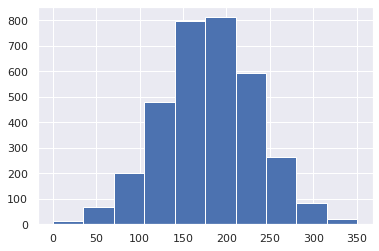

In [4]:
df["Total day minutes"].hist();

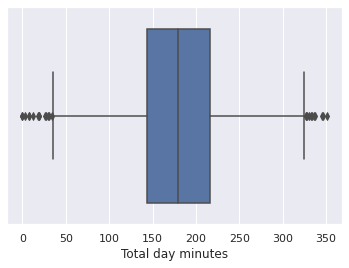

In [5]:
sns.boxplot(x=df["Total day minutes"]);

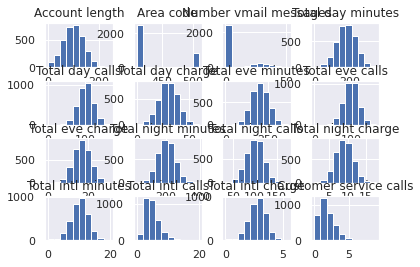

In [6]:
df.hist();

## 1.2 Категориальные (и бинарные)

In [7]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [8]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

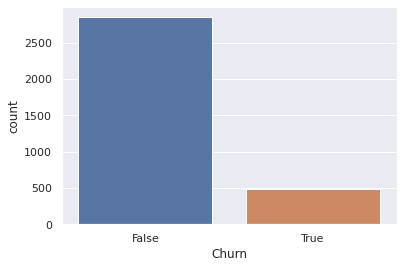

In [9]:
sns.countplot(x=df["Churn"]);

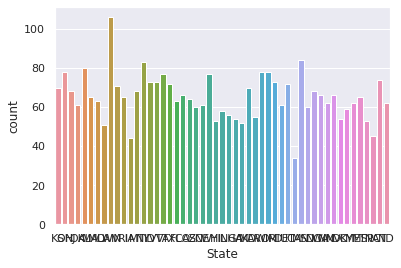

In [10]:
sns.countplot(x=df["State"]);

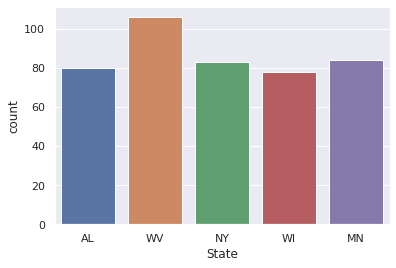

In [11]:
sns.countplot(x=df[df["State"].\
                 isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействие признаков
## 2.1. Количественные-количественные

Отберем все начиления (charge)

In [12]:
features = [f for f in df.columns if "charge" in f]

In [13]:
features

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

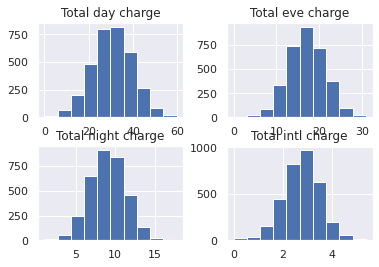

In [14]:
df[features].hist();

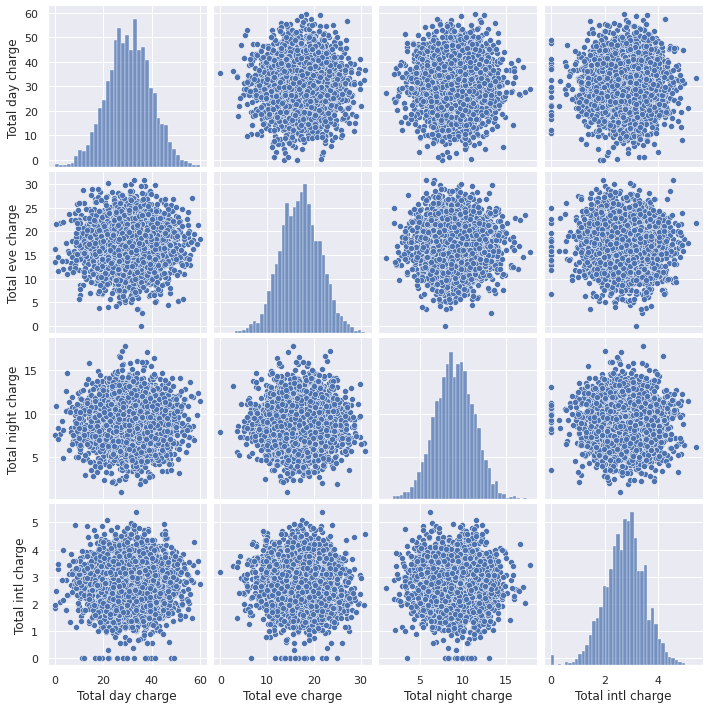

In [16]:
sns.pairplot(df[features]);

In [17]:
df["Churn"].map({False : "blue", True : "orange"}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

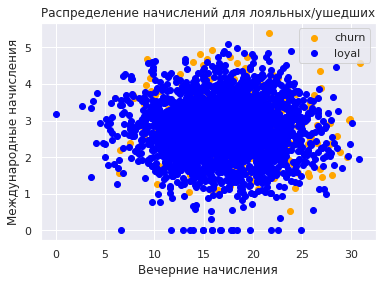

In [18]:
plt.scatter(df[df["Churn"]]["Total eve charge"], df[df["Churn"]]["Total intl charge"],
           color="orange", label="churn");
plt.scatter(df[~df["Churn"]]["Total eve charge"], df[~df["Churn"]]["Total intl charge"],
           color="blue", label="loyal");
plt.xlabel("Вечерние начисления");
plt.ylabel("Международные начисления");
plt.title("Распределение начислений для лояльных/ушедших")
plt.legend();

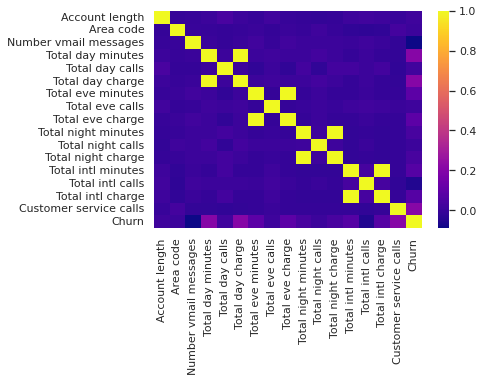

In [21]:
sns.heatmap(df.corr(), cmap="plasma");

In [22]:
df.drop(features, axis=1, inplace=True)

In [23]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

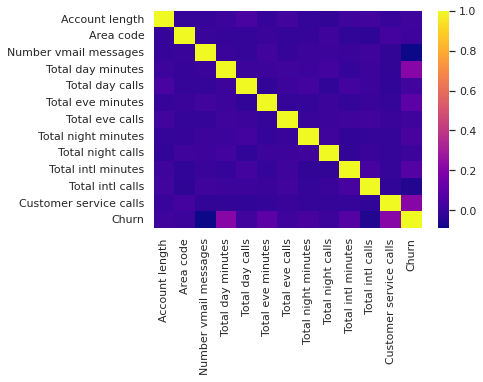

In [25]:
sns.heatmap(df.corr(), cmap="plasma");

## 2.2 Количественный-категориальный (количественный-бинарный)

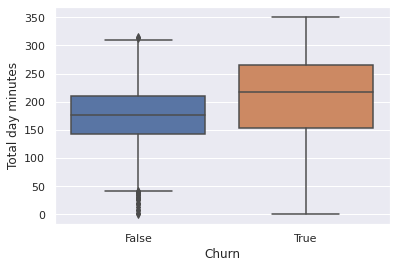

In [30]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

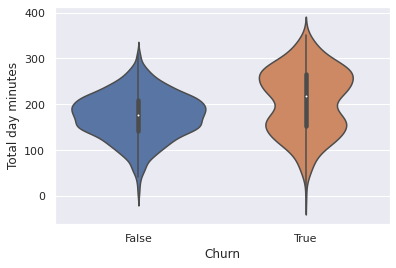

In [31]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [32]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

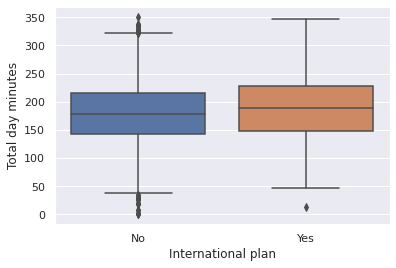

In [33]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3 Категориальный-категориальный (бинарный-бинарный)

In [34]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


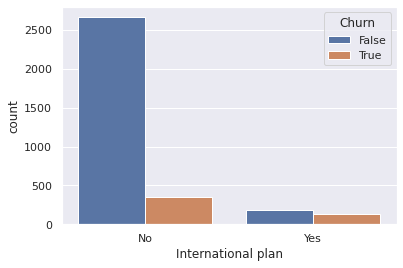

In [35]:
sns.countplot(x="International plan", hue="Churn", data=df);

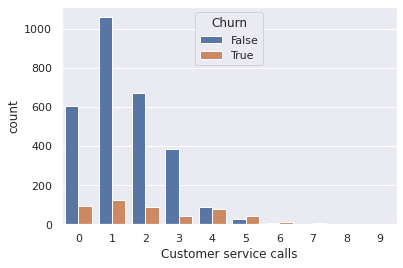

In [37]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

# t-SNE

Данные многомерные. d - число наших признаков у объектов

В многомерном пространстве точки каким-то образом распределены, и мы верим, что близость объектов как-то связана с их свойствами. Это гипотеза компактности

t-SNE - (manyfold learning) - t-distrubuted Stochastic Neighbor Embadding

Мы хотим получить некоторое представление наших данных. То есть найти некотоое отображение наших данных на 2-d (3-d) пространство. То есть найти некоторое низкоразмерное представление данных, так, чтобы отношение "соседства" сохранилось

In [38]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(random_state=0)

In [54]:
df2 = df.drop(["State", "Churn"], axis=1)

In [55]:
df2["International plan"] = df2["International plan"].map({"Yes" : 1, "No" : 0})

df2["Voice mail plan"] = df2["Voice mail plan"].map({"Yes" : 1, "No" : 0})

In [56]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [58]:
%%time
tsne.fit(df2)

/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 1min 25s, sys: 1.15 s, total: 1min 26s
Wall time: 7.86 s


TSNE(random_state=0)

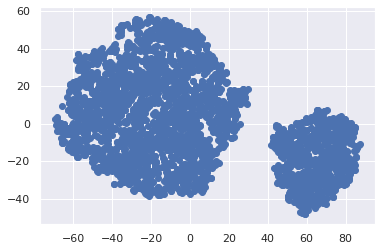

In [59]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);

In [60]:
df.shape

(3333, 16)

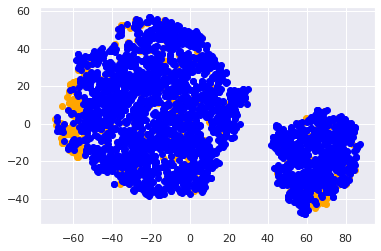

In [61]:
plt.scatter(tsne.embedding_[df["Churn"].values, 0], 
            tsne.embedding_[df["Churn"].values, 1],
            color="orange"
            );
plt.scatter(tsne.embedding_[~df["Churn"].values, 0], 
            tsne.embedding_[~df["Churn"].values, 1],
            color="blue"
            );

# Реальные данные по опросу OpenDataScience

In [62]:
poll_data = pd.read_csv("data/mlcourse_open_first_survey_parsed.csv", index_col="id")

In [63]:
poll_data.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [65]:
poll_data.shape

(2944, 14)

In [66]:
rename_dic = dict(
    zip(
        poll_data.columns,
        [
            "time",
            "intro",
            "jupyter",
            "expect",
            "sport",
            "personal",
            "math_level",
            "quest1",
            "quest2",
            "quest3",
            "fib_gen",
            "python",
            "github",
            "movie",
        ],
    )
)

In [67]:
poll_data.rename(columns=rename_dic, inplace=True)

In [68]:
poll_data.head()

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [69]:
poll_data["jupyter"].value_counts()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
                                                                ... 
пару раз включал                                                   1
Пробовал, не впечатлился. Попробую еще раз.                        1
Работал с Pandas и numpy                                           1
Знаю о инх, не работал.                                            1
чуток                                                              1
Name: jupyter, Length: 85, dtype: int64

In [77]:
jupyter_levels = poll_data["jupyter"].map({"Да" : 1, "Нет" : 0}).fillna(2)

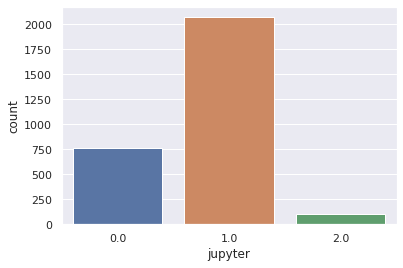

In [81]:
sns.countplot(x=jupyter_levels);

In [83]:
poll_data["sport"].value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

In [91]:
(poll_data["quest3"].dropna() == 2).sum() / poll_data["quest3"].dropna().shape[0]

0.9244036697247706

In [109]:
import numpy as np
all_words = np.concatenate(poll_data["intro"].apply(lambda s : 
                                            s.strip().split()).values)

In [110]:
len(all_words)

26533

In [111]:
pd.Series(list(all_words)).value_counts()

в                  1235
и                   734
на                  409
по                  283
Студент             279
                   ... 
направления,          1
нетехнического        1
Биоинформатик,        1
права.                1
онлайн-банкинг.       1
Length: 8294, dtype: int64

In [112]:
from nltk.corpus import stopwords

In [113]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/drapeykonik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [114]:
stopwords.words("russian")

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [117]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(stopwords.words("russian"))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64